In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv
/kaggle/input/multiple-disease-prediction/blood_samples_dataset_test.csv


In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings removal
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.feature_selection import RFE,SelectKBest,SelectFromModel
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

2024-11-30 13:16:38.928708: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 13:16:38.928857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 13:16:39.103273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Preprocessing

In [3]:
# defining dataframes
train_df = pd.read_csv('/kaggle/input/multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv')
test_df = pd.read_csv('/kaggle/input/multiple-disease-prediction/blood_samples_dataset_test.csv')

In [4]:
# checking train_df
train_df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [5]:
print('train shape:',train_df.shape)
print('test shape: ',test_df.shape)

train shape: (2351, 25)
test shape:  (486, 25)


In [6]:
train_df.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [7]:
# Are there any missing values?
print('train_df missing values: ',train_df.isna().sum().sum())
print('test_df missing values: ',test_df.isna().sum().sum())

train_df missing values:  0
test_df missing values:  0


In [8]:
# Unique variables in the target column of the training set.
print('-------train set-------')
print(f'Unique variables in the target column: {train_df.Disease.unique()}\nthe number of unique variables in the target column: {train_df.Disease.nunique()}\n')
# Unique variables in the target column of the test set.
print('-------test set-------')
print(f'Unique variables in the target column: {test_df.Disease.unique()}\nthe number of unique variables in the target column: {test_df.Disease.nunique()}')


-------train set-------
Unique variables in the target column: ['Healthy' 'Diabetes' 'Thalasse' 'Anemia' 'Thromboc']
the number of unique variables in the target column: 5

-------test set-------
Unique variables in the target column: ['Thalasse' 'Diabetes' 'Heart Di' 'Anemia' 'Thromboc' 'Healthy']
the number of unique variables in the target column: 6


In [9]:
# Let's combine 2 data frames.
data = pd.concat([train_df,test_df],ignore_index=True)

In [10]:
# let's check our new data frame.
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [11]:
data.shape # (rows, columns)

(2837, 25)

In [12]:
# Let's find out how many of each class there
data.Disease.value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

In [13]:
# Let's convert our target column to numeric values.
data.Disease = data.Disease.astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data.Disease = data.Disease.cat.codes.values
data.Disease

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

Text(0.5, 1.0, 'Correlation Heatmap')

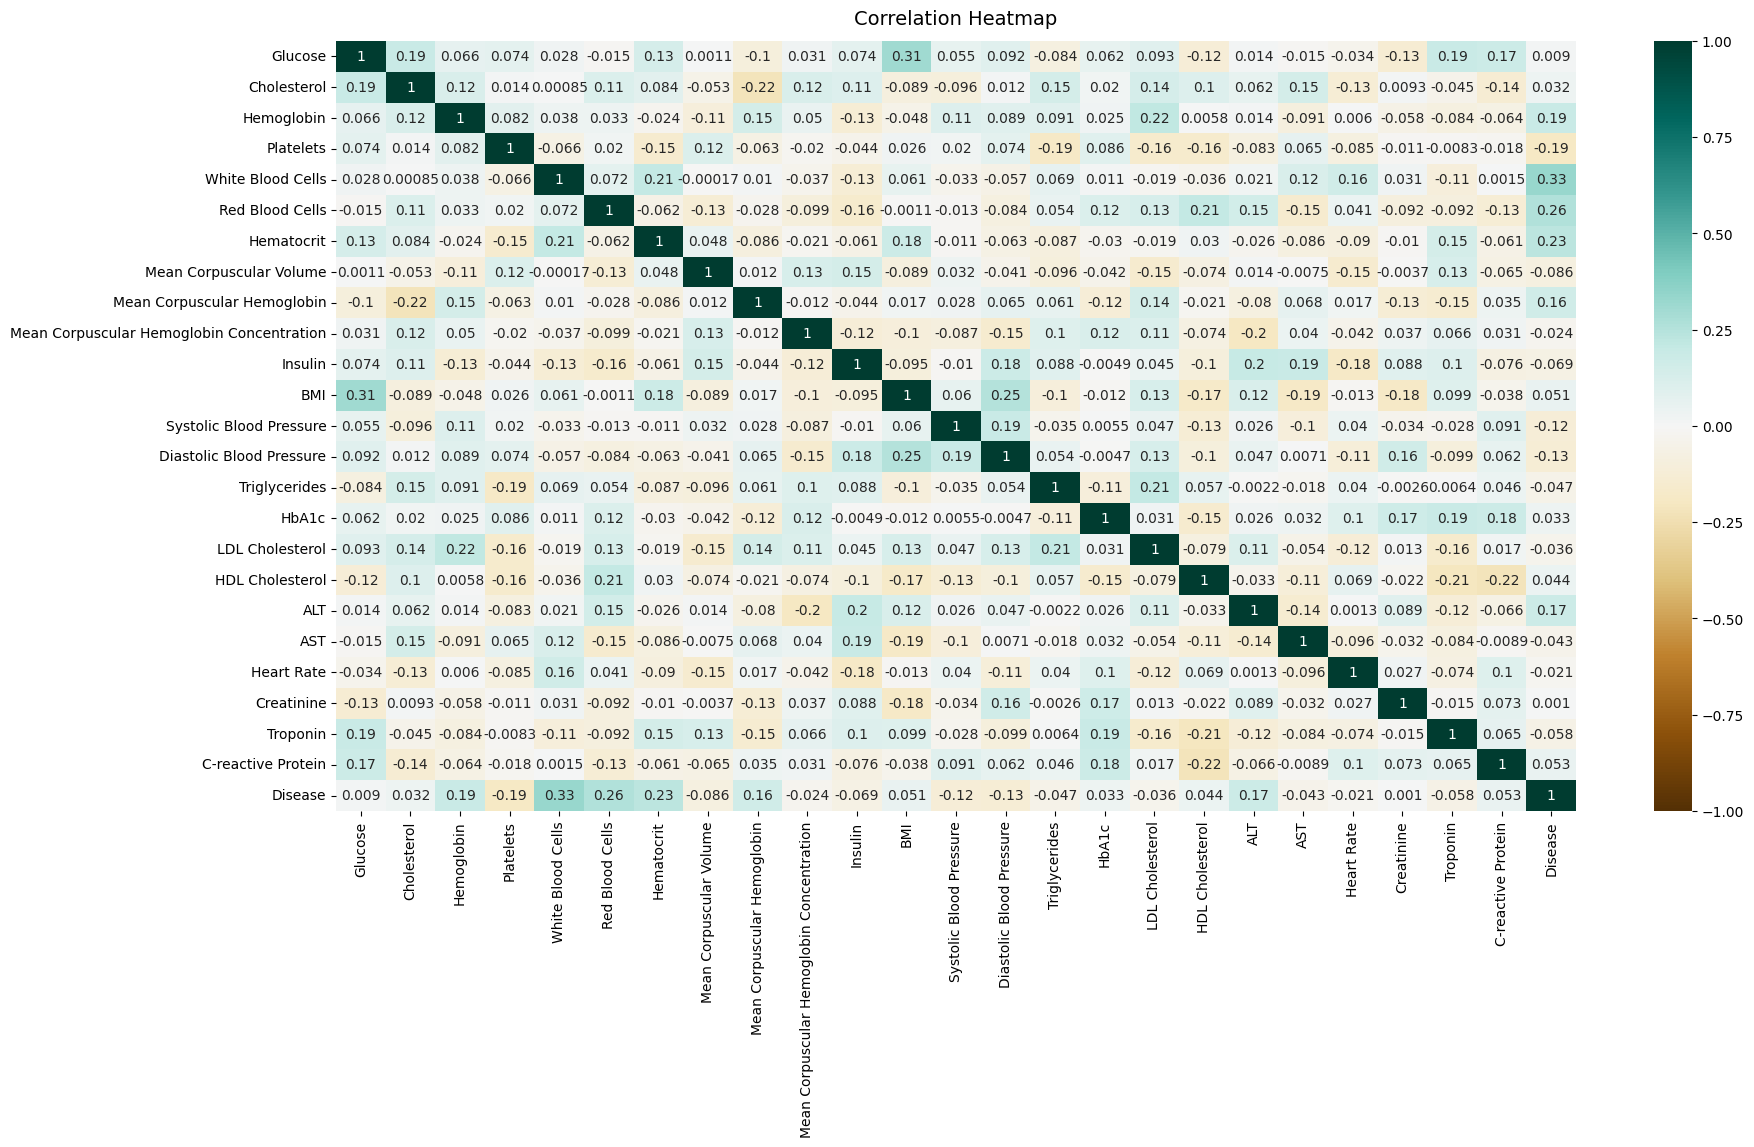

In [14]:
# Make a correlation matrix
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

2: Healty  
1: Diabetes
4: Thalasse  
0: Anemia  
5: Thromboc  
3: Heart Di

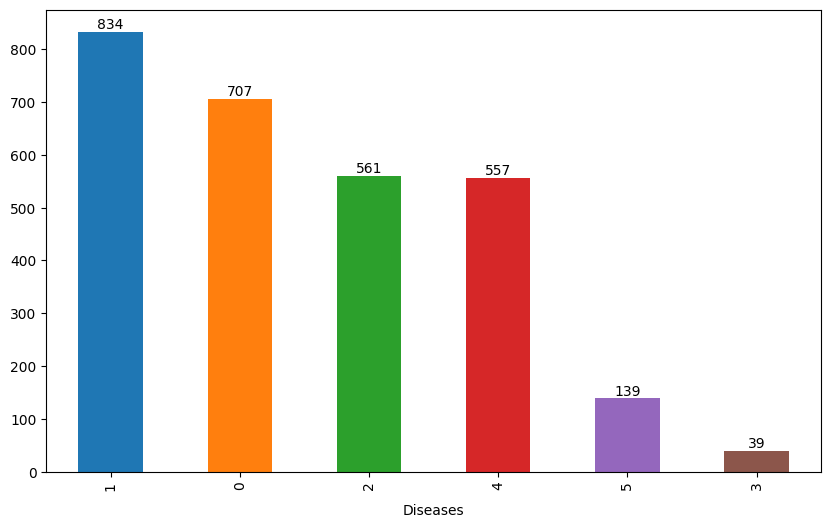

In [15]:
# Let's find how many of each class there are in the bar chart.
counts = data[data.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10,6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('Diseases',labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

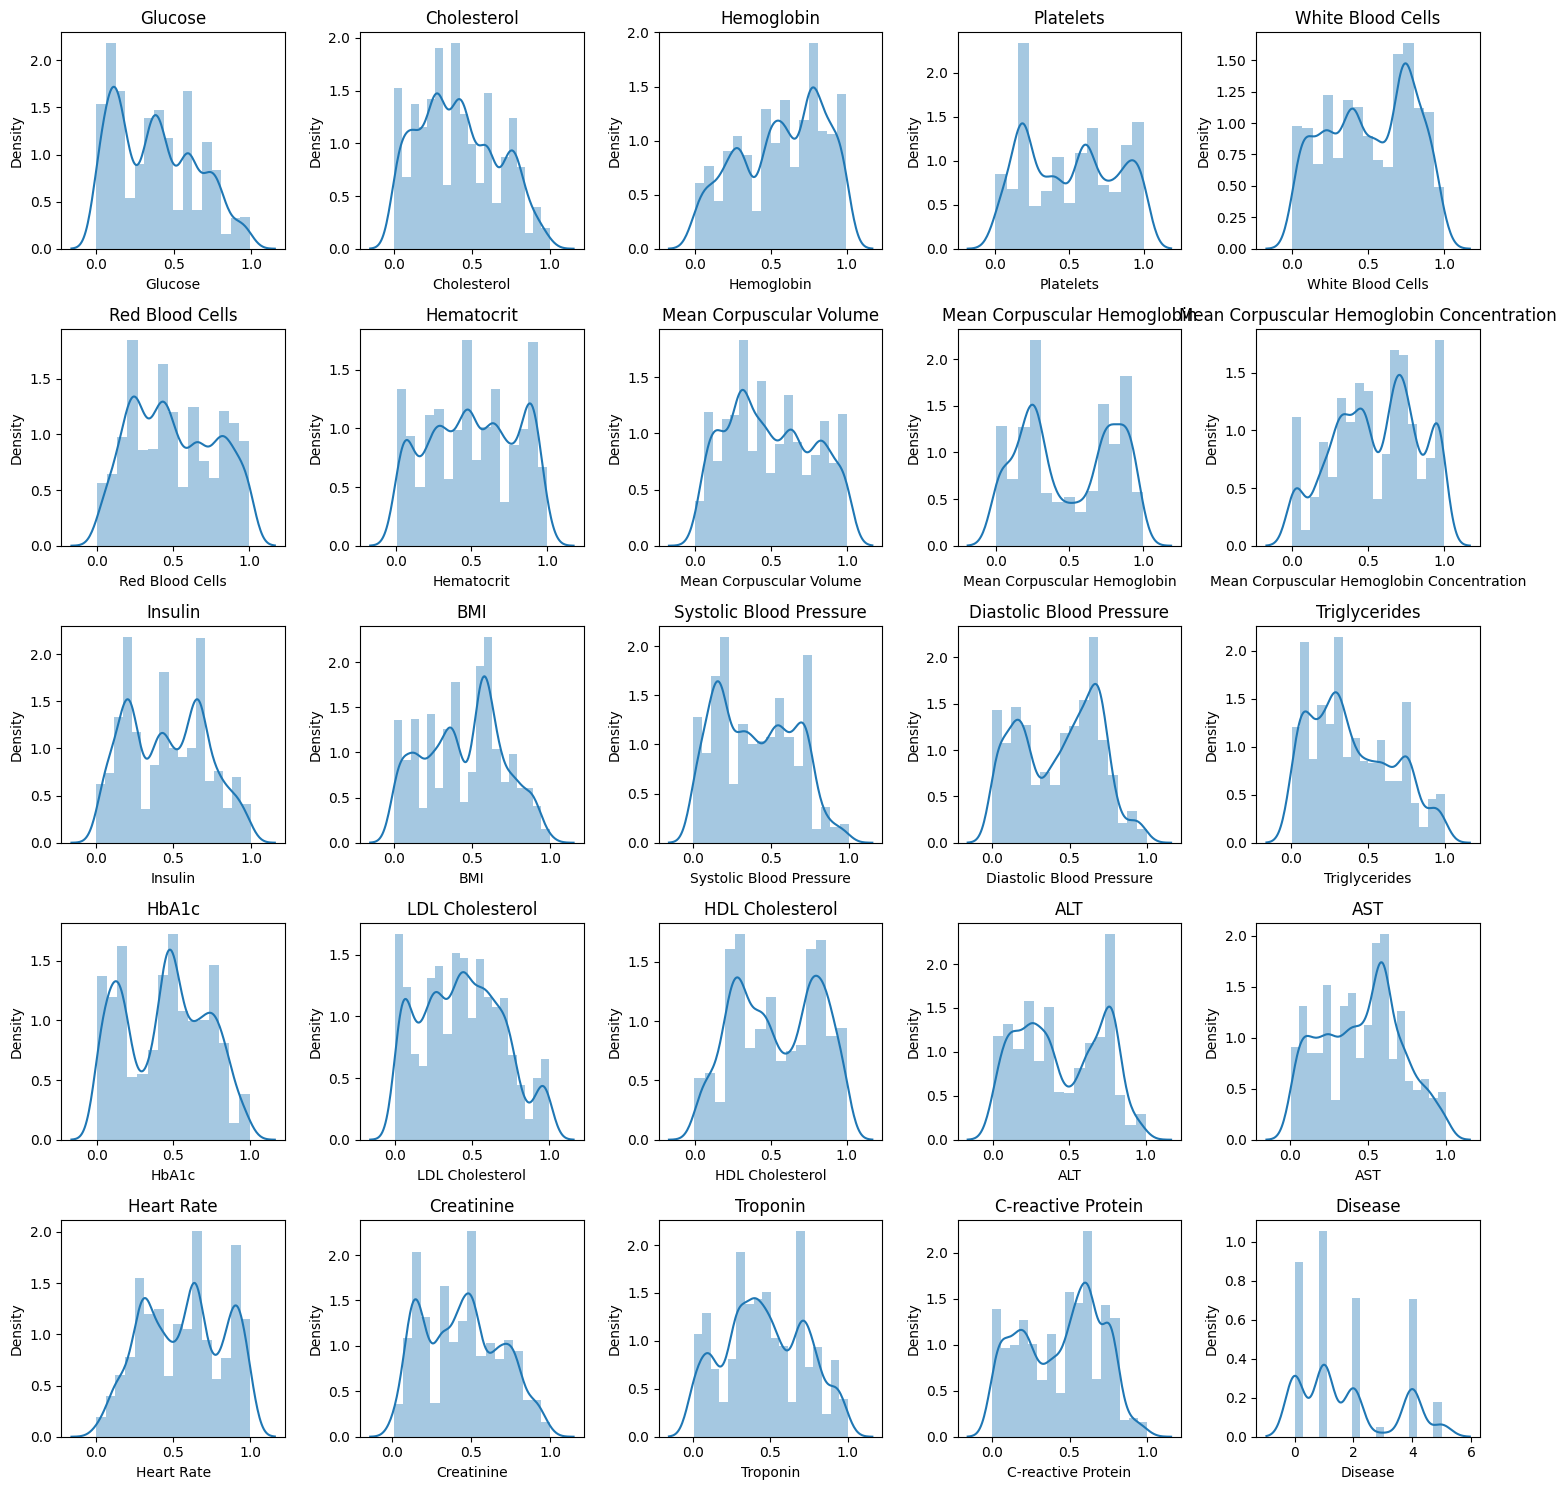

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

# Draw a distplot for each column and add it to the subplot
for i, col in enumerate(data.columns):
    sns.distplot(data[col], ax=axs[i//5, i%5])
    axs[i//5, i%5].set_title(col)

# Hide missing subplots
for i in range(len(data.columns), 25):
    axs[i//5, i%5].axis('off')

#  Show charts
plt.tight_layout()
plt.show()

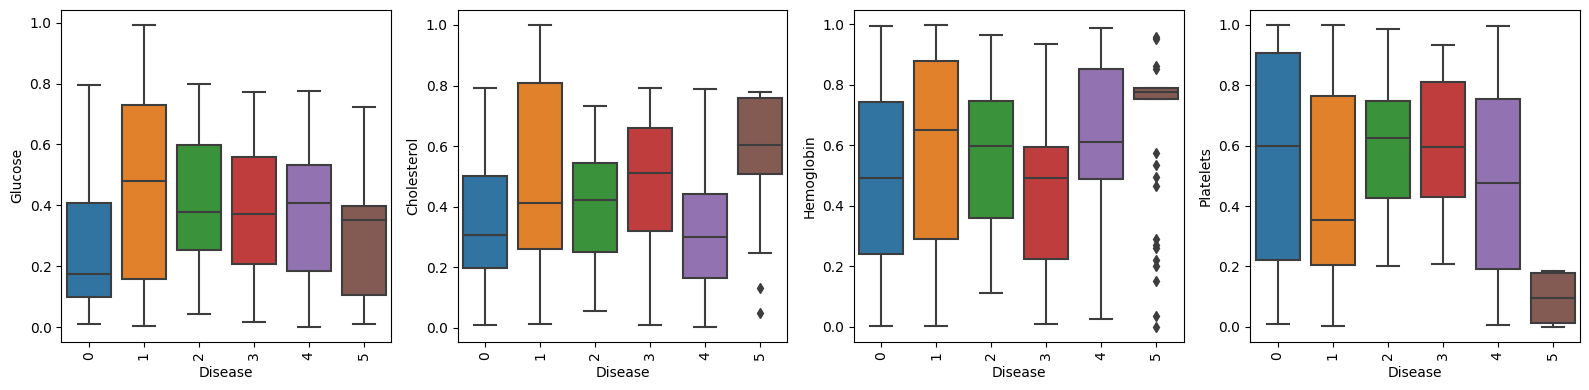

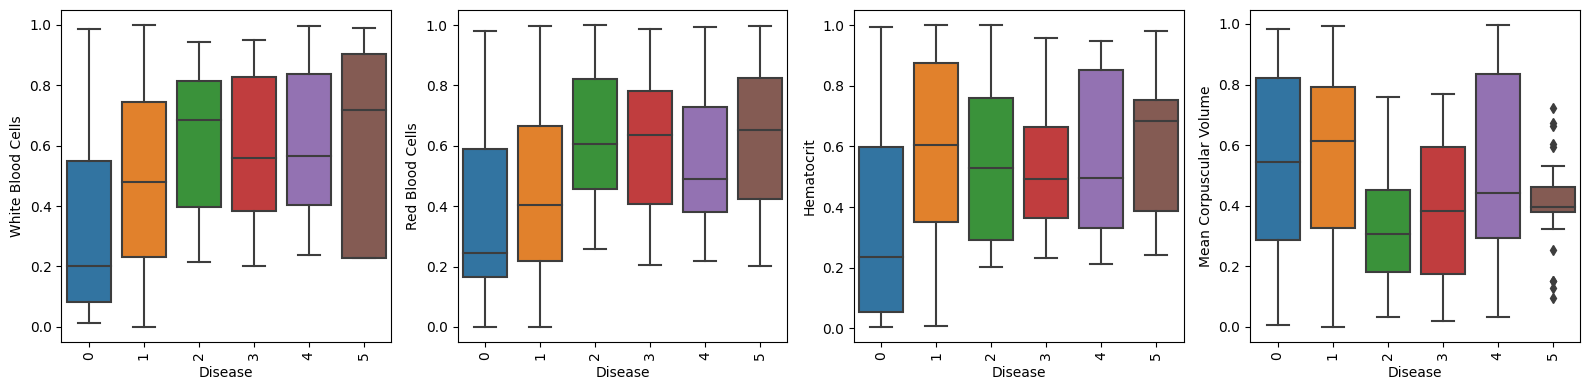

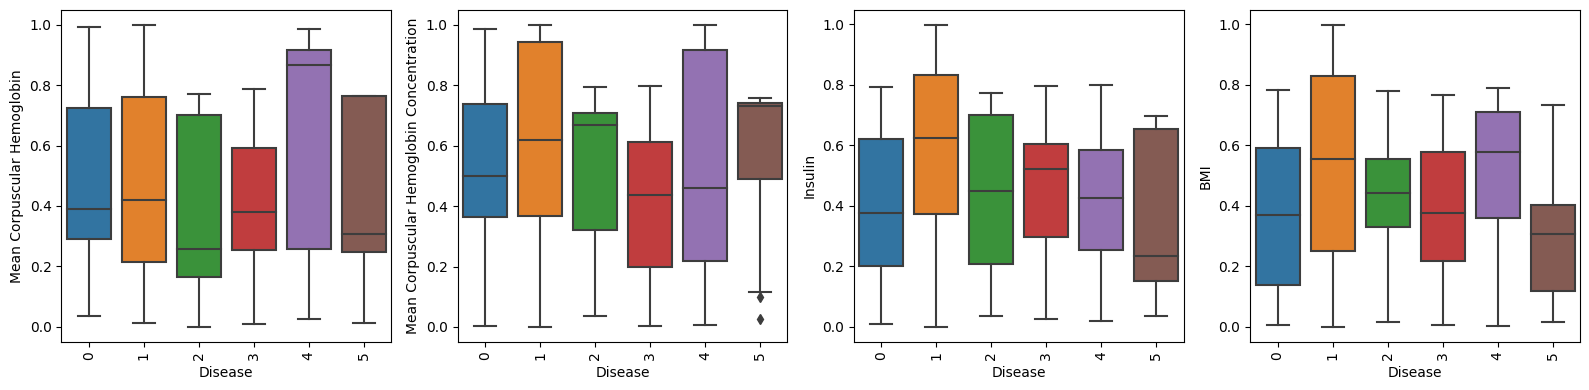

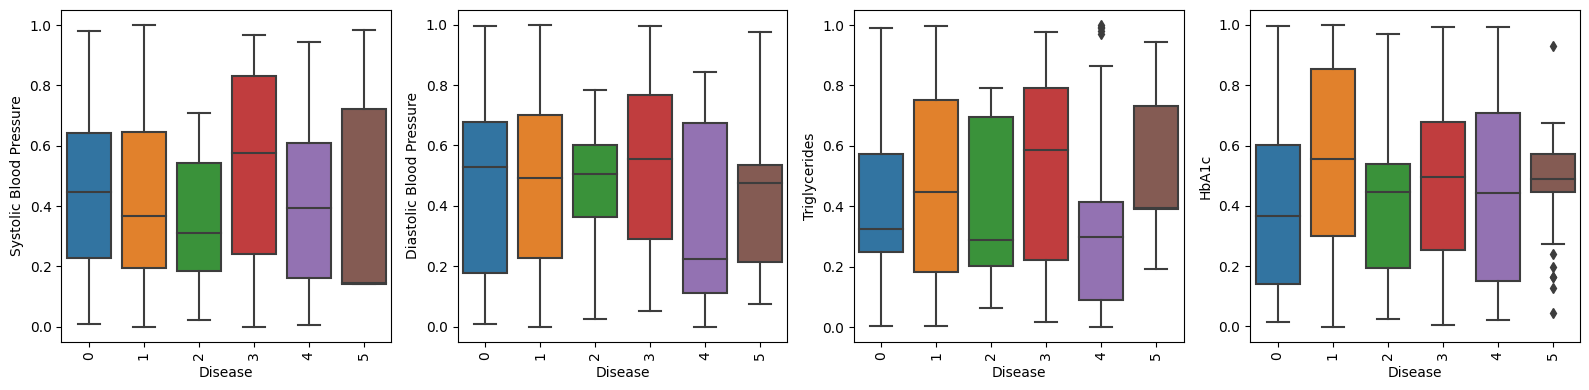

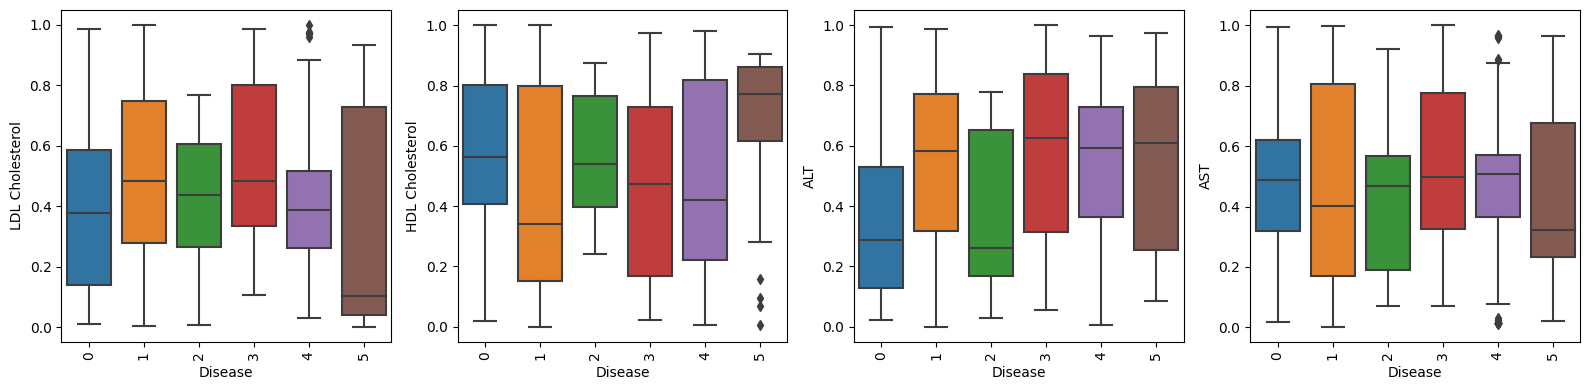

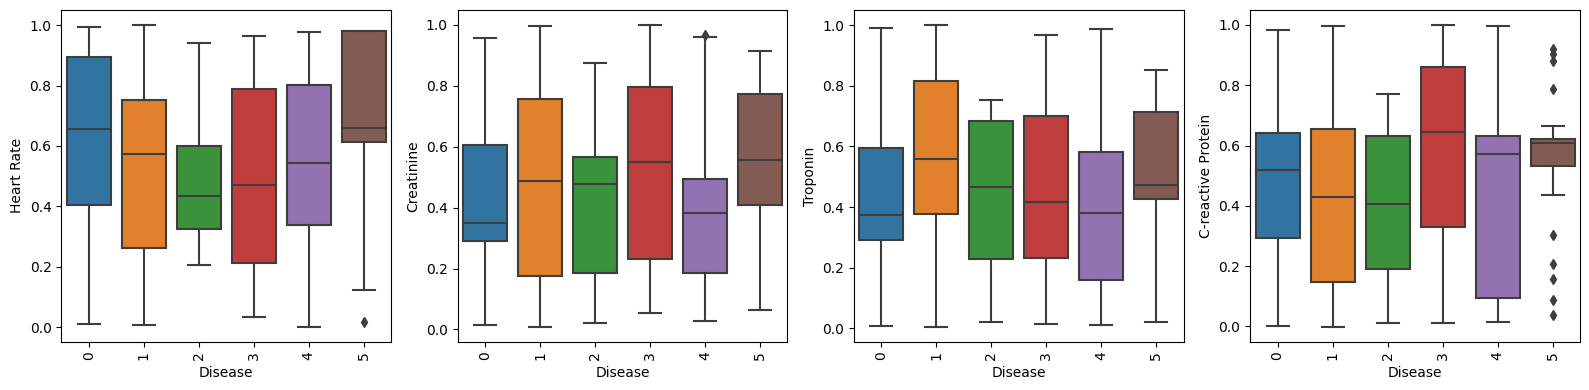

In [17]:
# Draw a boxplot for each column
index = 0
for i in range(0, len(data.columns) - 1, 4):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for j, ax in enumerate(axes.flat):
        if index < len(data.columns) - 1:
            sns.boxplot(data=data, x=data.columns[-1], y=data.columns[index], ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            index += 1
    plt.tight_layout()
    plt.show()

In [18]:
data['Hemoglobin'].describe()

count    2837.000000
mean        0.568941
std         0.278908
min         0.000719
25%         0.325035
50%         0.597916
75%         0.791215
max         0.997876
Name: Hemoglobin, dtype: float64

In [19]:
X = data.drop('Disease',axis=1)
y = data['Disease']

In [20]:
X

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


In [21]:
y

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

# ANN

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10,stratify= y)

In [24]:
results = pd.DataFrame([],columns=['Accuracy','train Accuracy'])

In [25]:
print('train shape:',X_train.shape)
print('test shape: ',X_test.shape)

train shape: (2269, 24)
test shape:  (568, 24)


In [26]:
# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create ann model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(64,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add( tf.keras.layers.Dense(6, activation='softmax'))

In [27]:
# let's compile our model.
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
# Let's add an early stop command.
early_stopping = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

In [29]:
# model fit
history = ann.fit(X_train_scaled, y_train, epochs=100,
                    validation_split=0.1, callbacks=[early_stopping], verbose=2)

Epoch 1/100
64/64 - 2s - 30ms/step - accuracy: 0.5989 - loss: 1.1140 - val_accuracy: 0.9295 - val_loss: 0.4072
Epoch 2/100
64/64 - 0s - 3ms/step - accuracy: 0.8879 - loss: 0.4216 - val_accuracy: 0.9339 - val_loss: 0.2380
Epoch 3/100
64/64 - 0s - 3ms/step - accuracy: 0.9280 - loss: 0.2755 - val_accuracy: 0.9383 - val_loss: 0.1889
Epoch 4/100
64/64 - 0s - 3ms/step - accuracy: 0.9310 - loss: 0.2285 - val_accuracy: 0.9427 - val_loss: 0.1779
Epoch 5/100
64/64 - 0s - 3ms/step - accuracy: 0.9471 - loss: 0.1858 - val_accuracy: 0.9515 - val_loss: 0.1443
Epoch 6/100
64/64 - 0s - 3ms/step - accuracy: 0.9466 - loss: 0.1566 - val_accuracy: 0.9471 - val_loss: 0.1444
Epoch 7/100
64/64 - 0s - 3ms/step - accuracy: 0.9598 - loss: 0.1251 - val_accuracy: 0.9427 - val_loss: 0.1586
Epoch 8/100
64/64 - 0s - 3ms/step - accuracy: 0.9657 - loss: 0.1051 - val_accuracy: 0.9515 - val_loss: 0.1538
Epoch 9/100
64/64 - 0s - 3ms/step - accuracy: 0.9647 - loss: 0.1102 - val_accuracy: 0.9471 - val_loss: 0.1490
Epoch 10/

In [30]:
print('test set',ann.evaluate(X_test_scaled,y_test)) # test set result
print('train set',ann.evaluate(X_train_scaled,y_train)) # train set result

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9365 - loss: 0.2224 
test set [0.21225297451019287, 0.9366196990013123]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9593 - loss: 0.1100
train set [0.10387120395898819, 0.9625385403633118]


In [31]:
ann_acc = ann.evaluate(X_test_scaled,y_test)
train_accuracy = ann.evaluate(X_train_scaled,y_train)
results.loc['ANN Model'] = [ann_acc,train_accuracy]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9365 - loss: 0.2224 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9593 - loss: 0.1100


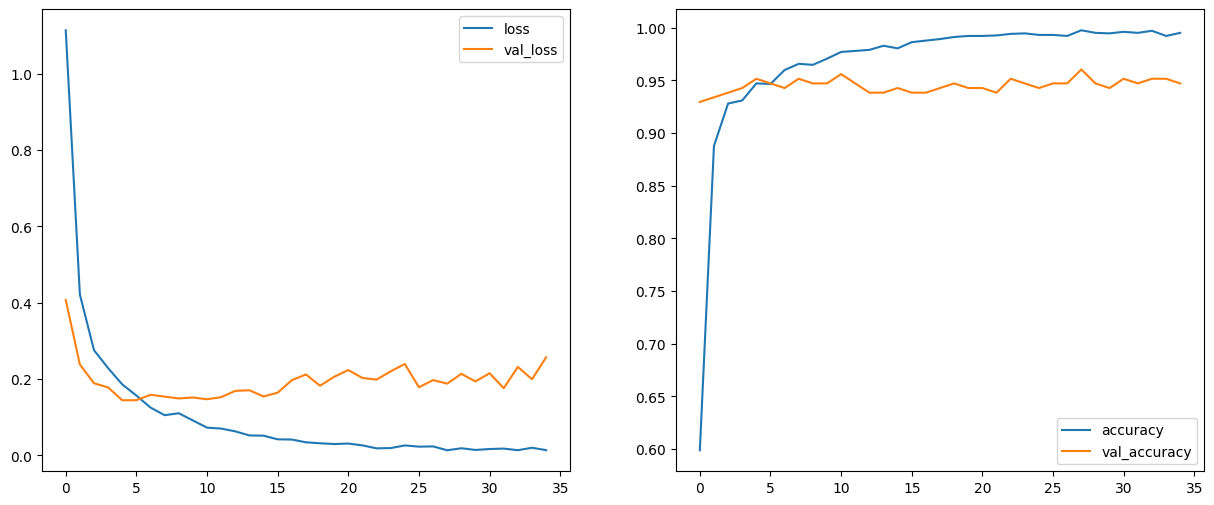

In [32]:
#  Let's plot the training set and validation set losses on a graph.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# All score DataFrame
results = pd.DataFrame([],columns=['Accuracy Score','Train Accuracy'])

In [35]:
# # Create a pipeline
# pipe = Pipeline([('scaler', StandardScaler()),('Classifier',RandomForestClassifier())])

# # Create space of candidate learning algorithms and their hyperparameters
# search_space = [{'Classifier': [LogisticRegression(max_iter=1000,solver='liblinear')],
#                  'Classifier__C': np.logspace(-2, 2, 20),
#                  'Classifier__penalty':['l1','l2']},
#                 {'Classifier': [KNeighborsClassifier()],
#                  'Classifier__n_neighbors':np.arange(1,10),
#                 'Classifier__p': [1,2]},
#                 {'Classifier': [RandomForestClassifier(random_state=20)],
#                  'Classifier__n_estimators': [300,400,500],
#                  'Classifier__max_features': ['sqrt',np.arange(6,24,3)],
#                 'Classifier__ccp_alpha':np.logspace(-3,-1,15)},
#                 {'Classifier': [GradientBoostingClassifier(random_state=10)],
#                  'Classifier__n_estimators': [100, 500, 1000],
#                  'Classifier__learning_rate':[0.001,0.01,0.1],
#                 'Classifier__ccp_alpha':np.logspace(-3,0,10)}]

# # Create grid search
# clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=3),
#                 verbose=1,scoring="accuracy",n_jobs=-1)
# # Model fit
# best_model = clf.fit(X_train, y_train)

# # View best model
# best_model.best_estimator_.get_params()

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix,ConfusionMatrixDisplay

In [37]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create model
model = GradientBoostingClassifier(ccp_alpha=0.001, learning_rate=0.01,
                            n_estimators=500, random_state=10)
# Model fit
model.fit(X_train_scaled,y_train)
# model predict
y_pred = model.predict(X_test_scaled)
acc= accuracy_score(y_test,y_pred)

print('GradientBoostingClassifier accuracy is:',acc)


GradientBoostingClassifier accuracy is: 0.9577464788732394


In [38]:
# train set predict
y_train_pred = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train,y_train_pred)
print('train set accuracy is:',train_acc)


results.loc['GradientBoostingClassifier'] = [acc,train_acc]

train set accuracy is: 0.9731159100925518


In [39]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=a544a2ecbf617ebdbe9f1819a770f80bcb6c8cd72ad3cbf080e82eb00c9c6430
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


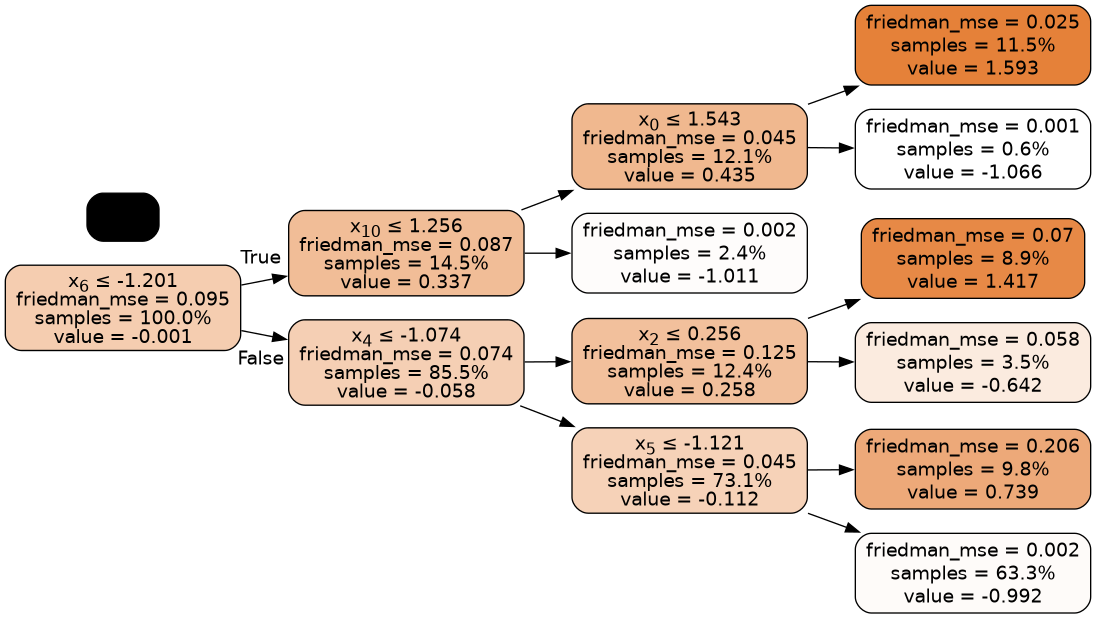

In [40]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

sub_tree_42 = model.estimators_[42,0]

dot_data = export_graphviz(
    sub_tree_42,
    rotate = True,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=True, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Display
Image(png)

In [41]:
# auc score of the multiclass model.
y_proba =np.array(model.predict_proba(X_test_scaled))
score = roc_auc_score(y_test,y_proba,multi_class='ovr',average='macro')
print('auc score of the multiclass model is:',score)

auc score of the multiclass model is: 0.99580599897078


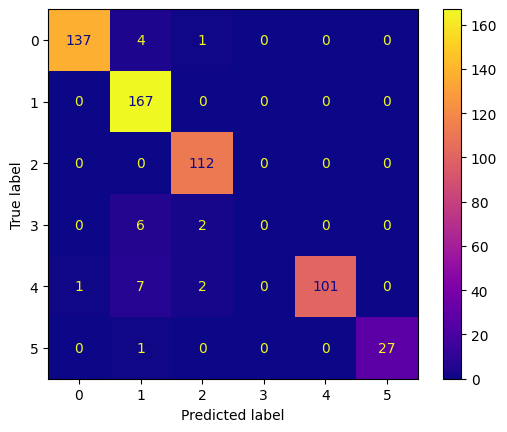

In [42]:
# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),
                              display_labels=model.classes_)
disp.plot(cmap='plasma')

plt.show()

# DecisionTreeClassifier

In [43]:
mdl = DecisionTreeClassifier()

path= mdl.cost_complexity_pruning_path(X_train,y_train)
path['ccp_alphas']

array([0.        , 0.00044072, 0.00044072, 0.00044072, 0.00058763,
       0.00058763, 0.00058763, 0.00077126, 0.00078351, 0.0007933 ,
       0.0007933 , 0.0008539 , 0.00085474, 0.00086588, 0.00086898,
       0.00087313, 0.00087537, 0.00087581, 0.00087726, 0.00088145,
       0.00100567, 0.00105773, 0.00106234, 0.00107977, 0.00110181,
       0.00113329, 0.00120791, 0.00125436, 0.00125606, 0.00125921,
       0.00131167, 0.00141091, 0.00151105, 0.00164537, 0.00173851,
       0.00195244, 0.00196798, 0.00201187, 0.00210224, 0.00247818,
       0.00255512, 0.00259468, 0.00261621, 0.00305877, 0.00361549,
       0.00453789, 0.00474187, 0.00504565, 0.00589325, 0.00630737,
       0.00705207, 0.00722858, 0.00794026, 0.01063061, 0.01141317,
       0.01161575, 0.01279897, 0.01663738, 0.01690359, 0.01738795,
       0.01774828, 0.02231182, 0.02241917, 0.02731697, 0.03154103,
       0.03405757, 0.03817191, 0.05442068, 0.05642132, 0.06872152])

In [44]:
# pipe = Pipeline([('scaler',StandardScaler()),('tree',DecisionTreeClassifier())])

# parameters = [{'tree':[DecisionTreeClassifier(random_state=2)],
#                'tree__max_features':np.arange(1,25),
#                'tree__ccp_alpha':path['ccp_alphas']}]

# grid = GridSearchCV(pipe,param_grid=parameters,cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=0),
#                     scoring='accuracy',n_jobs=-1, verbose=2)

# best_mdl = grid.fit(X_train,y_train)

# best_mdl.best_estimator_.get_params()

In [45]:
# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
mdl = DecisionTreeClassifier(random_state=2,max_features=18,ccp_alpha=0.002478180717510433)
# model fit
mdl.fit(X_train_scaled,y_train)
# test set predict
y_pred = mdl.predict(X_test_scaled)
# train set predict
y_tpred = mdl.predict(X_train_scaled)

train_score = accuracy_score(y_train,y_tpred)
score = accuracy_score(y_test,y_pred)
print('DecisionTreeClassifier accuracy is:',score)
print('DecisionTreeClassifier train accuracy is:',train_score)

results.loc['DecisionTreeClassifier'] = [score,train_score]

DecisionTreeClassifier accuracy is: 0.9383802816901409
DecisionTreeClassifier train accuracy is: 0.9673865138827678


In [46]:
from sklearn import tree

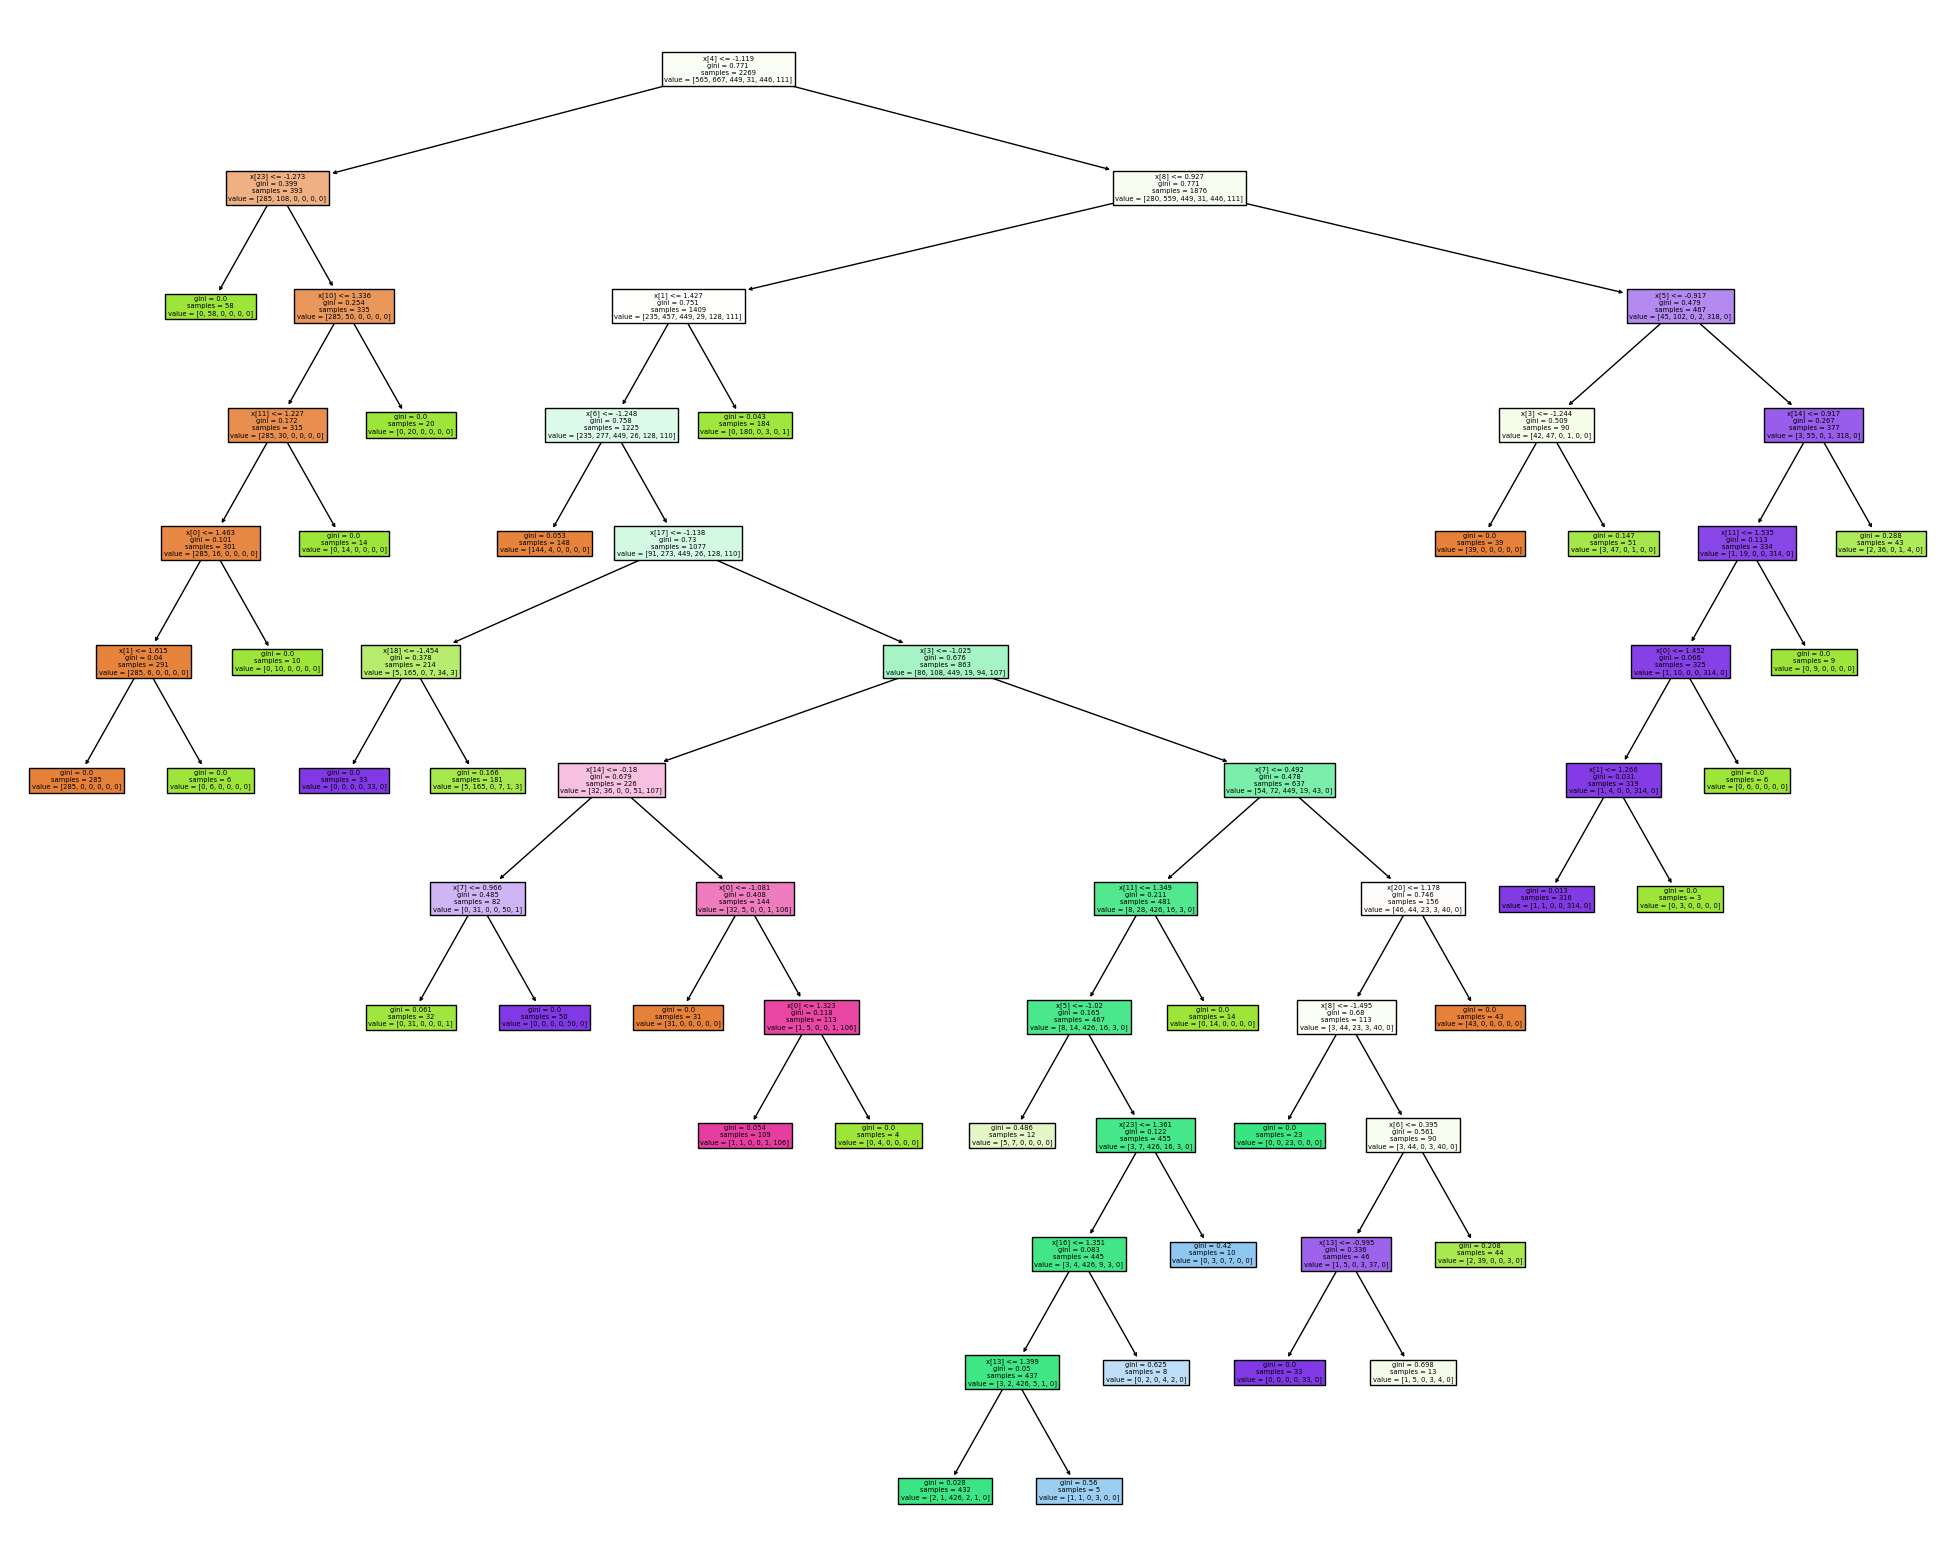

In [47]:
# plot tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mdl,filled=True)

# XGBClassifier

In [48]:
from xgboost import XGBClassifier

In [49]:
# xgbc = XGBClassifier()

# pipe = Pipeline([('scaler',StandardScaler()),('boost',xgbc)])

# params = [{'boost':[XGBClassifier(objective='softmax',eval_metric='merror')],
#            'boost__max_depth': np.arange(3,10),
#            'boost__learning_rate':[0.001,0.01,0.1,0.2],
#            'boost__subsample': [0.5,1],
#            'boost__n_estimators':[100,300,500,1000]}]

# clf = GridSearchCV(pipe,params,
#                    cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=1),
#                    scoring='accuracy',verbose=2,n_jobs=-1)

# best_model = clf.fit(X_train,y_train)
# best_model.best_estimator_.get_params()

In [50]:
# standardization
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train)
X_test_reduced = scaler.transform(X_test)
# create model
boost = XGBClassifier(n_estimators=1000, max_depth=9, learning_rate=0.01,
                       subsample=1,objective='multi:softprob')
# model fit
boost.fit(X_train_reduced,y_train)
# test set predict
y_pred = boost.predict(X_test_reduced)
# train set predict
train_pred = boost.predict(X_train_reduced)

xgb_train = accuracy_score(y_train,train_pred)
xgb_acc = accuracy_score(y_test,y_pred)

results.loc['XGBOOXGBClassifier'] = [xgb_acc,xgb_train]

print('XGBOOXGBClassifier accuracy is:',xgb_acc)

XGBOOXGBClassifier accuracy is: 0.9876760563380281


In [51]:
from xgboost import plot_tree

<Figure size 2000x1500 with 0 Axes>

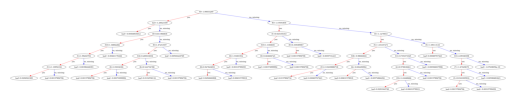

In [52]:
plt.figure(figsize=(20,15))
plot_tree(boost)
plt.show()

# Logistic Regression

In [53]:
# pipe = Pipeline([('scaler',StandardScaler()),('regression',LogisticRegression())])

# mdl_params = [{'regression':[LogisticRegression(max_iter=1000,random_state=10)],
#                'regression__C': [0.001, 0.01, 0.1, 1.0, 0.0],
#                'regression__penalty':['l1','l2','elasticnet'],
#                'regression__solver': ['saga'],
#                'regression__multi_class':['multinomial']}]


# clf = GridSearchCV(pipe,mdl_params,
#                    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=1),
#                    scoring='accuracy',verbose=2,n_jobs=-1)

# best_model = clf.fit(X_train,y_train)
# best_model.best_estimator_.get_params()

In [54]:
# standardization
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train)
X_test_reduced = scaler.transform(X_test)

# Create model
logmodel = LogisticRegression(max_iter= 1000, solver = 'saga', penalty= 'l1',
                              random_state = 10, C = 1.0, multi_class = 'multinomial')
# model fit
logmodel.fit(X_train_reduced,y_train)
# test set predict
y_pred = logmodel.predict(X_test_reduced)
# train set predict
train_pred = logmodel.predict(X_train_reduced)

logmodel_train = accuracy_score(y_train,train_pred)
logmodel_acc = accuracy_score(y_test,y_pred)

results.loc['LogisticRegression'] = [logmodel_acc,logmodel_train]

print('LogisticRegression accuracy is:',logmodel_acc)


LogisticRegression accuracy is: 0.8785211267605634


In [55]:
results

,Accuracy Score,Train Accuracy
GradientBoostingClassifier,0.957746,0.973116
DecisionTreeClassifier,0.938380,0.967387
XGBOOXGBClassifier,0.987676,1.000000
LogisticRegression,0.878521,0.878801


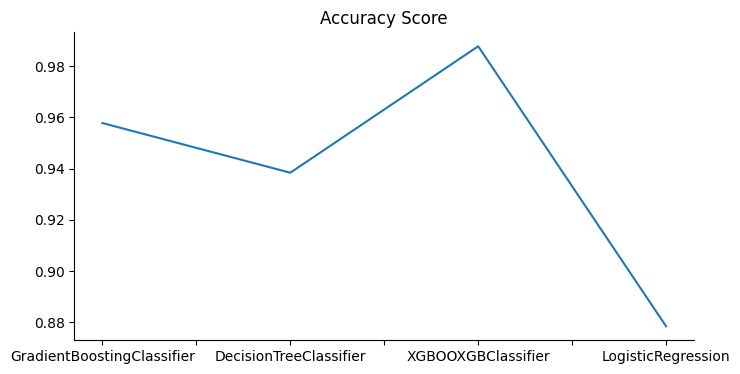

In [56]:
# Accuracy Score
from matplotlib import pyplot as plt
results['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)